<a href="https://colab.research.google.com/github/amrit1203/sales_prediction/blob/main/Sale_prediction_using_advertising_prices_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression model to predict sales using advertising rates

MySQL is connected using pymysql library.
Data is imported from advertising table.


In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

''' Extracting data from MySQL free database'''
# Install and Import MySQL Database Dependencies
!pip install pymysql
import pymysql
import sqlalchemy

# Initialize Connection Hyperparameters
HOSTNAME = 'sql5.freesqldatabase.com'
USER = 'sql5425557'
PASSWORD = 'PkBPfl3yTc'
DATABASE = 'sql5425557'
TABLE = 'advertising'

# Instantiate a MySQL Connection String
# conn_string = f'mysql+pymysql://<USER>:<PASSWORD>@<HOSTNAME>/<DATABASE>'
conn_string = f'mysql+pymysql://'+USER+':'+PASSWORD+'@'+HOSTNAME+'/'+DATABASE
engine = sqlalchemy.create_engine(conn_string)

# Run a MySQL Query
#query = f'SELECT * FROM <DATABASE>.<TABLE>'
query = f'SELECT * FROM '+DATABASE+'.'+TABLE
 
# Read MySQL Query Result/Data
import pandas as pd
adv = pd.read_sql_query(query, engine)


Showing some fields of table

In [12]:
#@title count { run: "auto" }
count = 15 #@param {type:"slider", min:0, max:50, step:1}
# Import and display first five rows of advertising dataset
#advert = pd.read_csv('sample_data/advertising.csv')
print(adv.head(count))

       TV  Radio  Newspaper   Sales
0   230.1   37.8       37.8    22.1
1    44.5   39.3       39.3    10.4
2    17.2   45.9       45.9     9.3
3   151.5   41.3       41.3    18.5
4   180.8   10.8       10.8    12.9
5   100.0   76.0       56.0  7565.0
6   200.0  767.0       56.0     6.0
7    34.0   67.0       56.0    67.0
8    67.0   67.0       65.0    67.0
9    93.0   67.0       65.0    67.0
10    4.0    6.0       56.0    67.0
11  959.0   67.0      656.0   677.0
12  934.0   67.0       56.0    67.0
13   33.0    7.0       56.0    76.0
14   44.0   67.0        6.0   776.0


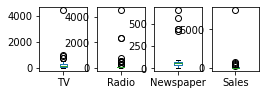

In [13]:
#@title Layout { run: "auto" }
a =  3#@param {type:"raw"}
b =  6#@param {type:"integer"}
import matplotlib.pyplot as pl
from matplotlib import pyplot
adv.plot(kind='box', subplots=True, layout=(a,b), sharex=False, sharey=False)
pyplot.show()

Histogram

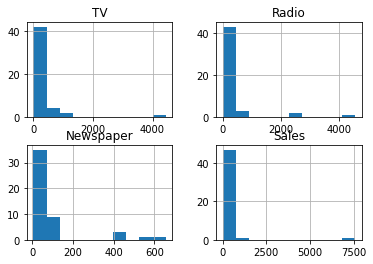

In [14]:
adv.hist()
pyplot.show()

Scatter Matrix

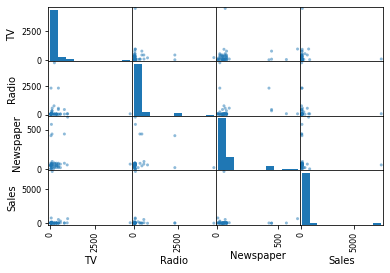

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(adv)
pyplot.show()

Initialising our simple regression model using stats model

Sales predicition done using Radio advertising

In [16]:
import statsmodels.formula.api as smf

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Sales ~ Radio', data=adv)
model = model.fit()
sales_pred = model.predict()

Visualizing 

Radio advertising vs Sales

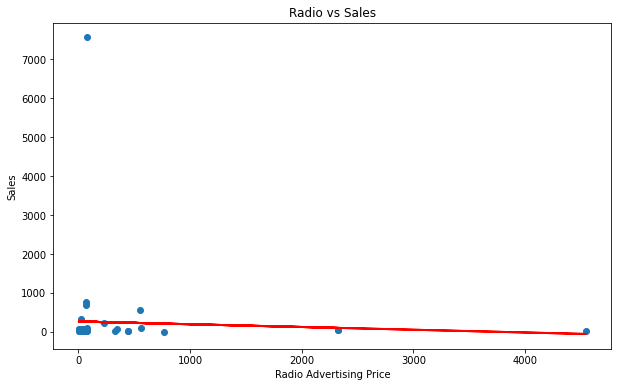

In [17]:
#@title Figure size { run: "auto" }
a =  10#@param {type:"integer"}
b =  6#@param {type:"integer"}
# Predict values


# Plot regression against actual data
plt.figure(figsize=(a, b))
plt.plot(adv['Radio'], adv['Sales'], 'o')           # scatter plot showing actual data
plt.plot(adv['Radio'], sales_pred, 'r', linewidth=2)   # regression line
plt.xlabel('Radio Advertising Price')
plt.ylabel('Sales')
plt.title('Radio vs Sales')

plt.show()

Amount spent on TV advertise can help us predict the sales.

In [18]:
#@title Amount
amount = 490 #@param {type:"slider", min:0, max:1000, step:1}
model.predict({"Radio": amount})

0    231.108242
dtype: float64

Building Regression model using two Advertising fields.
Enter any two (TV, Radio or Newspaper)

Enter the amount spent too

In [19]:
#@title Predictors { run: "auto" }
predictor1 = "TV" #@param {type:"string"}
predictor2 = "Radio" #@param {type:"string"}
# Build linear regression model using TV and Radio as predictors
# Split data into predictors 
predictors = [predictor1, predictor2]
X = adv[predictors]
y = adv['Sales']

# Initialise and fit model
lin = LinearRegression()
model = lin.fit(X, y)



In [20]:
#@title Enter the amount spent on advertising { run: "auto", vertical-output: true }
p1_price =  400#@param {type:"integer"}
p2_price =  500#@param {type:"integer"}
nX = [[p1_price, p2_price]]
print("Sales is: ")
print(model.predict(nX))

Sales is: 
[225.06182593]
